In [62]:
import os

# Pobranie bieżącego katalogu
current_dir = os.getcwd()

# Sprawdzenie, czy już jesteśmy w "lab_2"
if current_dir.endswith("lab_2"):
    print("OK")
else:
    os.chdir("lab_2")
    print("lab_2 ustawione")


OK


In [ ]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Excercise 1 -  Generated Quantities Block

In [64]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


In [65]:
samples = gen_quant.sample(data={'M':5}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)

21:47:19 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

21:47:19 - cmdstanpy - INFO - CmdStan done processing.


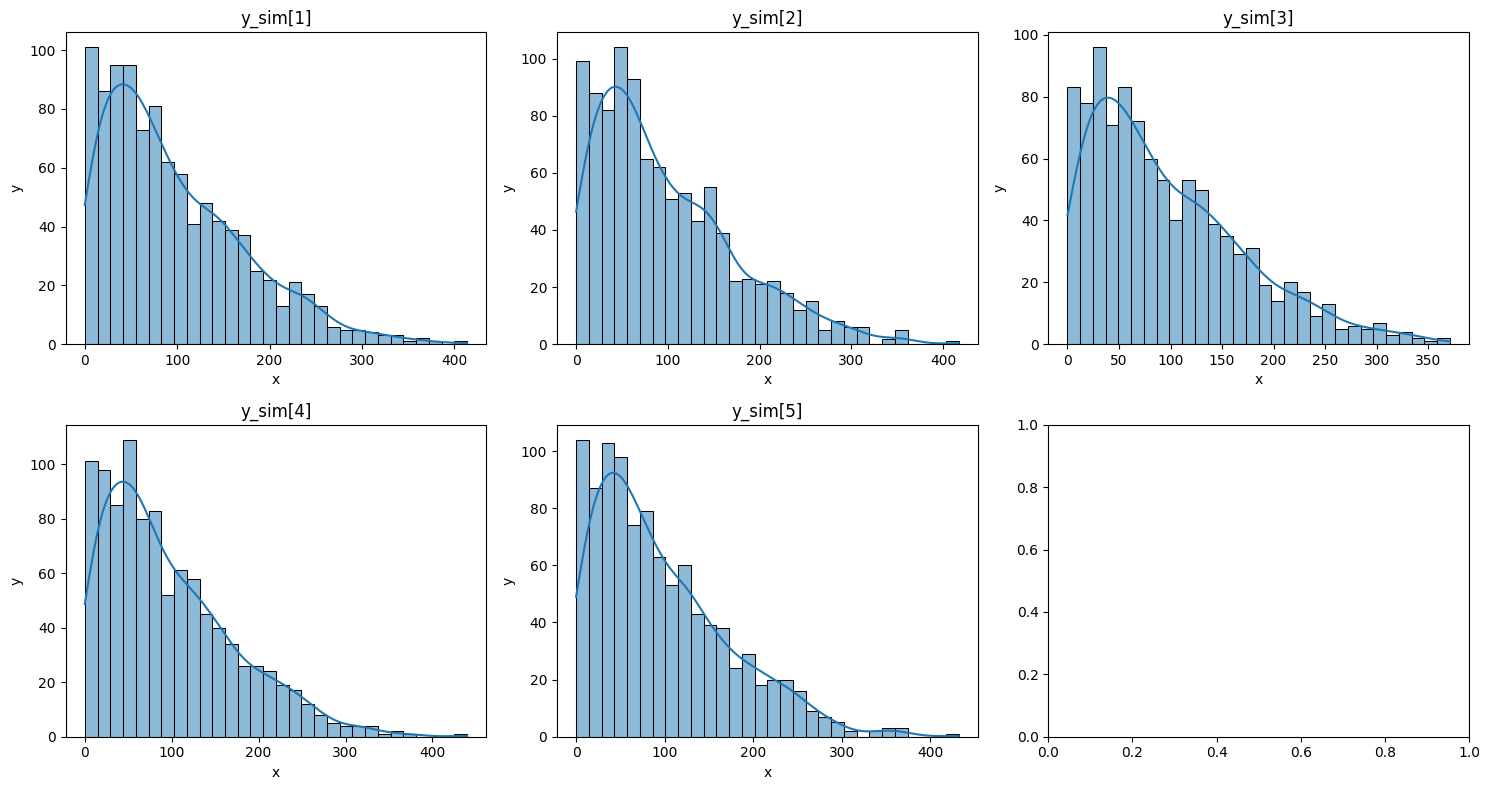

In [68]:
df = samples.draws_pd()

y_sim_columns = [col for col in df.columns if col.startswith('y_sim[')]


num_cols = len(y_sim_columns)

fig, axes = plt.subplots(nrows=num_cols // 3 + 1, ncols=3, figsize=(15, 5*num_cols//3))
axes = axes.flatten()  


for i, col in enumerate(y_sim_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])  
    axes[i].set_title(col)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")


plt.tight_layout()
plt.show()

## Excercise 2 - Constraints on the data 

In [73]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

21:51:08 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

21:51:08 - cmdstanpy - INFO - CmdStan done processing.


In [77]:



bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

21:53:16 - cmdstanpy - INFO - compiling stan file /workspace/lab_2/code_3.stan to exe file /workspace/lab_2/code_3


ValueError: Failed to compile Stan model '/workspace/lab_2/code_3.stan'. Console:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=code_3.stan --o=/workspace/lab_2/code_3.hpp /workspace/lab_2/code_3.stan
Syntax error in 'code_3.stan', line 3, column 27 to column 28, parsing error:
   -------------------------------------------------
     1:  data {
     2:      int<lower=1> N;
     3:      int<lower=0,upper=1> y[N];
                                    ^
     4:  }
     5:  parameters {
   -------------------------------------------------

";" expected after variable declaration.
It looks like you are trying to use the old array syntax.
Please use the new syntax:
array[N] int<lower=0, upper=1> y;
make: *** [make/program:66: /workspace/lab_2/code_3.hpp] Error 1

Command ['make', 'STANCFLAGS+=--filename-in-msg=code_3.stan', '/workspace/lab_2/code_3']
	error during processing No such file or directory


## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [ ]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


In [ ]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [ ]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

In [ ]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [ ]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = # number of letters in the first name
L = # number of letters in the last name
y0 = # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

## Excercise 5 - different methods of defining models


In [ ]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target(data=data,seed=seed)
result_3 = model_log_target_ind(data=data,seed=seed)



In [ ]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [ ]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = )
# investigate the output and plot histogram of mean_y variable